# Bay Area, CA - Airbnb Data


### Context

Since its inception in 2008, Airbnb has disrupted the hospitality industry by allowing almost anyone to rent out a spare room and host travelers looking for an overnight stay.

While Airbnb has publicly available data from many locations, **Santa Clara County is of particular interest as it is one of the major counties in the Bay Area and home to many prominent tech companies and startups in the Silicon Valley.**
As such, home prices and cost of living are exceptionally high in this area, as one will see in the data.

### Content

All data is publicly available under the Creative Commons "Public Domain Dedication" license and has been updated as of June 12th, 2020.Provided are metrics that are publicly visible for each listing (e.g. name, description, price, reviews, etc.), but the dataset contains some Airbnb's internal metrics as well (review score accuracy, host acceptance rate, etc.).

### Acknowledgements

Acknowledgments go to Airbnb for their publicly released datasets that are available at this website.

### Inspiration & ideas:

1. Create a price-suggestion model for new Airbnb hosts who might not know the value of their listing.
   - Text mining with statified house price data
2. Can we predict the rating of an Airbnb listing utilizing **NLP** of the description columns?How have Airbnb
3. prices changed over time? Are prices seasonal?
   - Time series analysis?
4. Which areas in the Santa Clara County are most "popular"?
   - Region analysis
5. Which features of an Airbnb listing are important to add to its perceived value?
   - Feature analysis,PCA
   - Correlation analysis


#### Notes:

1.  Selecting the data you need : feature_df, instead of take them all even if you drop some of the missing value columns.
2.  Making binary data in on column, instead of one-hot encoding.
3.  PCA

## Import libraries and data


In [1766]:
import pandas as pd
import numpy as np
from scipy.stats import stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

In [1629]:
data = pd.read_csv('./data/Airbnb_Listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,NaN,NaN,https://a0.muscache.com/im/pictures/529448/3d7...,NaN,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,$90.00,$440.00,"$1,428.00",$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,NaN,NaN,https://a0.muscache.com/im/pictures/121321/2c5...,NaN,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,https://a0.muscach

In [1630]:
data.shape

(7221, 106)

## Data Cleaning


### Visualize missing and null values

In [1631]:
def percent_missing(df,rows):
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)

    missing_value_df = pd.DataFrame(
        {'column_name': df.columns,
        'percent_missing': percent_missing}).sort_values(by='percent_missing', ascending=False)
    missing_value_df.reset_index(drop=True, inplace=True)

    return missing_value_df.head(rows)


In [1632]:
percent_missing(data,40)

,column_name,percent_missing
0,neighbourhood_group_cleansed,100.00
1,thumbnail_url,100.00
2,license,100.00
3,xl_picture_url,100.00
4,medium_url,100.00
5,square_feet,99.60
6,weekly_price,92.05
7,monthly_price,91.80
8,notes,48.87
9,access,43.17


In [1633]:
drop_cols = percent_missing(data, 8).iloc[:,0]

In [1634]:
data.drop(drop_cols, axis=1, inplace=True)

In [1635]:
percent_missing(data,10)

,column_name,percent_missing
0,notes,48.87
1,access,43.17
2,transit,42.72
3,interaction,41.10
4,neighborhood_overview,37.07
5,host_about,32.32
6,house_rules,31.35
7,host_response_rate,25.02
8,host_response_time,25.02
9,space,23.64


### Drop columns

In [1636]:
# find missing values and single value columns in data:
del_cols = []

for col in data.columns:
    if data[col].isna().all():
        del_cols.append(col)
    elif data[col].nunique() == 1:
        del_cols.append(col)

In [1637]:
del_cols

['scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready']

In [1638]:
data = data.drop(del_cols, axis=1)

In [1639]:
# delete url column:
urls = [
    'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url',
    'host_picture_url'
]


In [1640]:
# drop urls
data = data.drop(urls, axis=1)

In [1641]:
def data_uiniqueness(df):
    uniq_list = []
    for col in data.columns:
        list_unique = (col, len(data[col].unique()))
        uniq_list.append(list_unique)

    unique_df = pd.DataFrame(uniq_list).sort_values(ascending=False,by=1)
    unique_df.columns = ['column_name', 'unique_values']
    return unique_df

In [1642]:
data_uiniqueness(data)

,column_name,unique_values
0,id,7221
2,name,7078
5,description,6440
45,amenities,6396
36,longitude,6357
3,summary,6052
35,latitude,5882
4,space,4403
11,house_rules,3718
12,host_id,3533


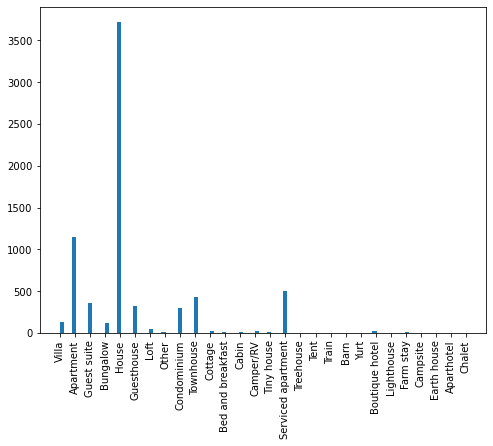

In [1643]:
#Visualize proprty_type:

_, ax = plt.subplots(figsize=(8, 6))

ax.hist(data['property_type'], bins=100)

plt.xticks(rotation=90)
plt.show()

In [1644]:
data['state'].unique()  # Bay area, same state, to drop

array(['CA', 'Ca', 'ca', nan, 'California '], dtype=object)

In [1645]:
data = data.drop(['zipcode', 'state'], axis=1)


<AxesSubplot:>

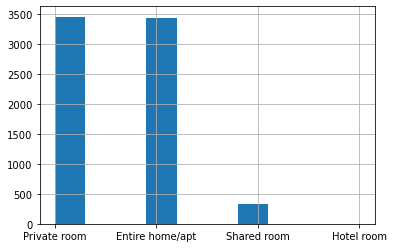

In [1646]:
data['room_type'].hist(bins=10)

In [1647]:
data['room_type'].value_counts()

Private room       3454
Entire home/apt    3431
Shared room         334
Hotel room            2
Name: room_type, dtype: int64

In [1648]:
data.drop(data[data['room_type'] == 'Hotel room'].index, inplace=True)


### Clean the city column


In [1649]:
data['city'].unique()

array(['Palo Alto', 'Santa Clara', 'Mountain View', 'San Jose',
       'Cupertino', 'Sunnyvale', 'Campbell', 'Milpitas', 'Saratoga',
       'Morgan Hill', 'Los Altos', 'Los Gatos', 'Menlo Park',
       'Los Altos Hills', 'Monte Sereno', 'Hollister', 'Gilroy',
       'San Jose ', 'San Martin', 'Stanford', 'Santa Clara County',
       'Sunnyvale ', 'Palo Alto ', 'Milpitas ', 'Los Gatos ', 'san jose',
       'Mountain View ', 'Danville ', nan, 'Campbell ', '洛斯阿尔托斯',
       'santa clara', 'Fremont', '圣何塞', 'Watsonville'], dtype=object)

In [1650]:
data['city'] = data['city'].str.replace('圣何塞', 'San Jose')
data['city'] = data['city'].str.replace('san jose', 'San Jose')
data['city'] = data['city'].str.replace('洛斯阿尔托斯', 'Los Altos')
data['city'] = data['city'].str.replace('santa clara', 'Santa Clara')
data['city'] = data['city'].str.replace('Santa Clara County', 'Santa Clara')
data['city'].str.strip()

0           Palo Alto
1         Santa Clara
2       Mountain View
3           Palo Alto
4            San Jose
            ...      
7216         San Jose
7217      Santa Clara
7218        Sunnyvale
7219         San Jose
7220         San Jose
Name: city, Length: 7219, dtype: object

In [1651]:
data['city'].unique()

array(['Palo Alto', 'Santa Clara', 'Mountain View', 'San Jose',
       'Cupertino', 'Sunnyvale', 'Campbell', 'Milpitas', 'Saratoga',
       'Morgan Hill', 'Los Altos', 'Los Gatos', 'Menlo Park',
       'Los Altos Hills', 'Monte Sereno', 'Hollister', 'Gilroy',
       'San Jose ', 'San Martin', 'Stanford', 'Sunnyvale ', 'Palo Alto ',
       'Milpitas ', 'Los Gatos ', 'Mountain View ', 'Danville ', nan,
       'Campbell ', 'Fremont', 'Watsonville'], dtype=object)

In [1652]:
data['city'].value_counts(ascending=False)

San Jose           3031
Palo Alto           787
Sunnyvale           764
Santa Clara         714
Mountain View       665
Cupertino           335
Milpitas            296
Los Gatos           133
Campbell            128
Los Altos            90
Saratoga             70
Morgan Hill          63
Los Altos Hills      53
Gilroy               32
Monte Sereno         16
San Martin           15
Menlo Park            4
Palo Alto             4
San Jose              3
Stanford              3
Fremont               3
Hollister             2
Sunnyvale             1
Milpitas              1
Los Gatos             1
Mountain View         1
Danville              1
Campbell              1
Watsonville           1
Name: city, dtype: int64

### Find the unique values in each column


<AxesSubplot:>

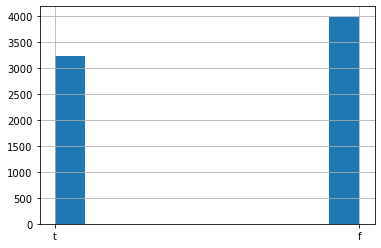

In [1653]:
data['host_is_superhost'].hist(bins=10)

In [1654]:
(data['require_guest_profile_picture'] ==
 data['require_guest_phone_verification']).value_counts()


True     7082
False     137
dtype: int64

Drop the 'require_guest_profile_picture' later


### Clean the duplicated columns,drop the following columns

based on the analysis abvoe, we can drop the following columns:


In [1655]:
data.drop([
    'host_id', 'last_scraped', 'market', 'require_guest_profile_picture',
    'minimum_maximum_nights', 'host_total_listings_count',
    'calendar_last_scraped'
],
          axis=1,
          inplace=True)

### Explore categorical features

In [1656]:
def categories_less_10_plot(df):
    plot_cols = []
    for col, n in zip(df.columns,df.nunique()):
        if n < 10:
            plot_cols.append(col)

    _, axes = plt.subplots(6,3, figsize=(20, 14),
                           constrained_layout=True)

    for col, ax in zip(plot_cols, axes.flatten()):
        df[col].hist(bins=10,ax=ax)
        ax.set_title(col)

    plt.show()

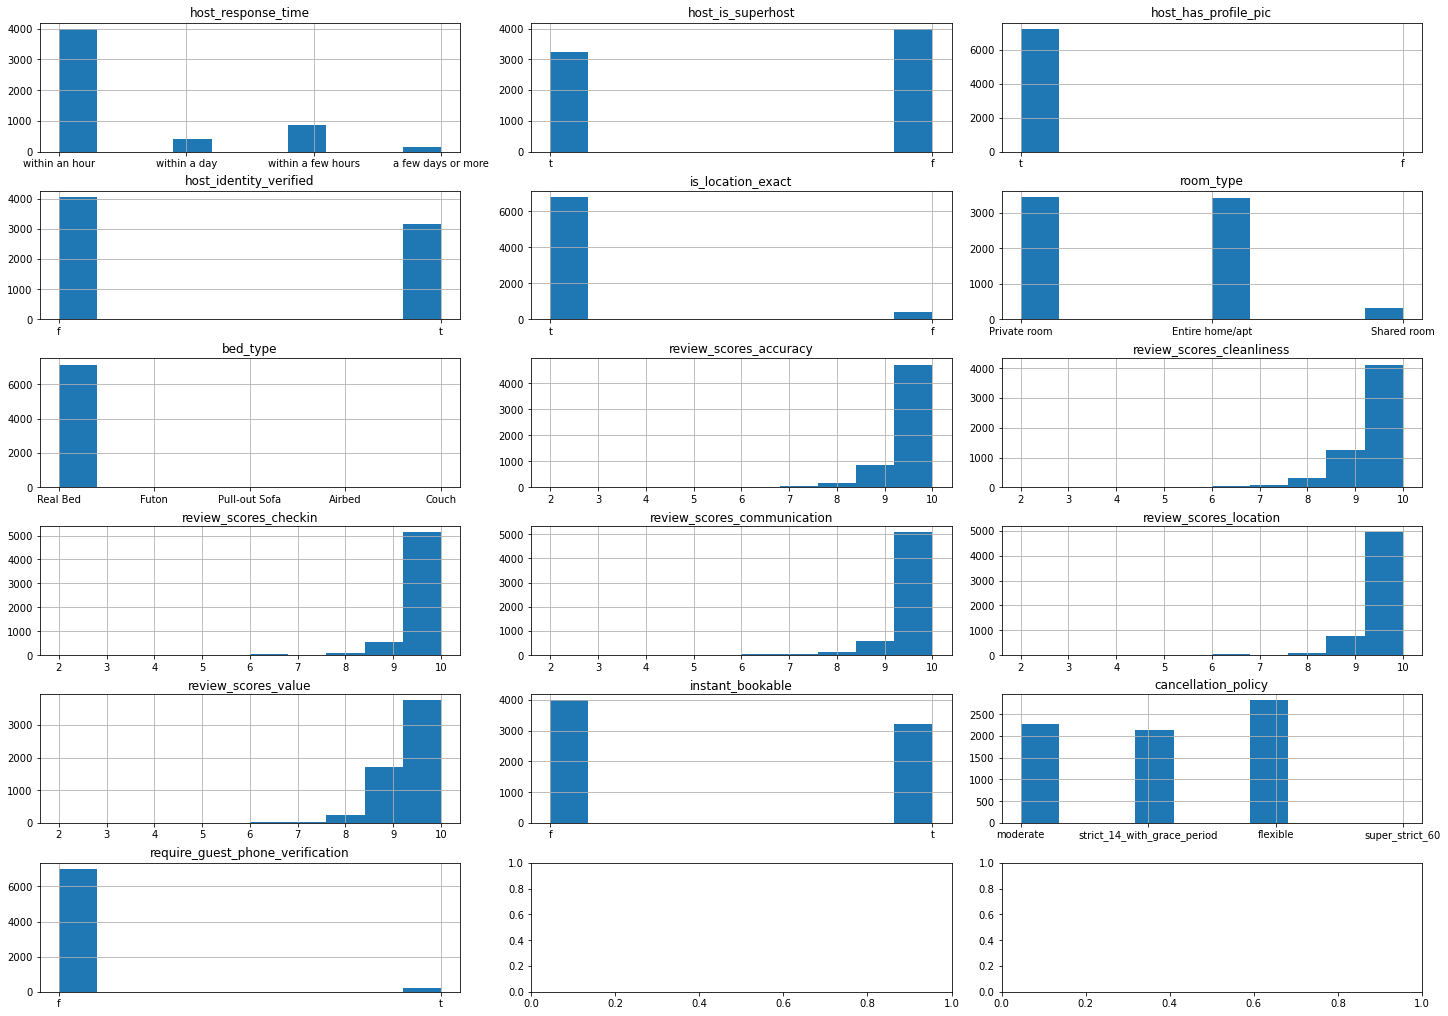

In [1657]:
categories_less_10_plot(df=data)

In [1658]:
data['is_location_exact'].value_counts()

t    6794
f     425
Name: is_location_exact, dtype: int64

In [1659]:
# drop the unbalanced categories:
data.drop(
    data[data['cancellation_policy'] == 'super_strict_60'].index,
    inplace=True)

In [1660]:
data.drop(['is_location_exact','require_guest_phone_verification'], axis=1, inplace=True)

In [1661]:
# binary_cols = []
# triple_cols = []
# quater_cols = []

# for col in data.columns:
#     if data[col].nunique() == 2:
#         binary_cols.append(col)
#     elif data[col].nunique() ==3:
#         triple_cols.append(col)
#     elif data[col].nunique() == 4:
#         quater_cols.append(col)
    
        

# print(binary_cols)
# print(triple_cols)
# print(quater_cols)

In [1662]:
# for col in quater_cols:
#     print(data[col].value_counts(ascending=False))


In [1663]:
# bed_type
data['bed_type'].value_counts(ascending=False) # to drop

Real Bed         7153
Futon              30
Couch              14
Airbed             11
Pull-out Sofa      10
Name: bed_type, dtype: int64

### Transfer the unit of currency to float


In [1664]:
price_list = [
    'price',
    'security_deposit',
    'cleaning_fee',
    'extra_people',
]

In [1665]:
for p in price_list:
    print(p, data[p].isna().sum())


price 0
security_deposit 1457
cleaning_fee 800
extra_people 0


In [1666]:
for p in price_list:
    data[p].fillna('$0.00', inplace=True)
    data[p] = data[p].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_20734/1242419390.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[p] = data[p].str.replace('$', '').str.replace(',', '').astype(float)


In [1667]:
data[price_list].isna().sum()

price               0
security_deposit    0
cleaning_fee        0
extra_people        0
dtype: int64

In [1668]:
data[price_list].head(3)

,price,security_deposit,cleaning_fee,extra_people
0,90.0,0.0,35.0,45.0
1,85.0,700.0,250.0,10.0
2,65.0,1000.0,0.0,0.0


#### `data.groupby('host_response_time')['price'].value_counts(bins=6).to_frame()`

In [1669]:
data['price'].value_counts(bins=10).to_frame()

,price
"(0.009000000000000001, 1009.0]",7138
"(1009.0, 2008.0]",53
"(2008.0, 3007.0]",16
"(9001.0, 10000.0]",5
"(3007.0, 4006.0]",4
"(4006.0, 5005.0]",1
"(5005.0, 6004.0]",1
"(6004.0, 7003.0]",0
"(7003.0, 8002.0]",0
"(8002.0, 9001.0]",0


In [1670]:
data.drop(data[data['price'] >= 2008].index, inplace=True)

### Fill missingvalues

In [1671]:
data['reviews_per_month'].fillna(data['reviews_per_month'].mean(),
                                 inplace=True)
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace=True)
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)

<AxesSubplot:>

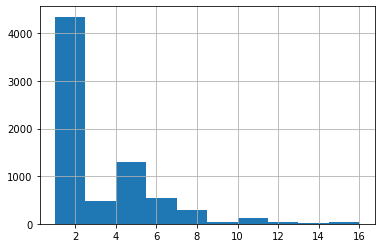

In [1672]:
data['accommodates'].hist(bins=10)

####  `value_counts(normalize=True).loc[lambda x: x > 0.2]` for categorical features analysis

In [1673]:
cat_features = data.select_dtypes(include=['object']).columns
cat_features

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'smart_location', 'property_type',
       'room_type', 'bed_type', 'amenities', 'calendar_updated',
       'first_review', 'last_review', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

In [1674]:
cat_cols = []

for col in cat_features:
    list_unique = (col, len(data[col].unique()))
    print(col)
    print(data[col].value_counts(normalize=True).loc[lambda x: x > 0.2])
    cat_cols.append(list_unique)

name
Series([], Name: name, dtype: float64)
summary
Series([], Name: summary, dtype: float64)
space
Series([], Name: space, dtype: float64)
description
Series([], Name: description, dtype: float64)
neighborhood_overview
Series([], Name: neighborhood_overview, dtype: float64)
notes
Series([], Name: notes, dtype: float64)
transit
Series([], Name: transit, dtype: float64)
access
Series([], Name: access, dtype: float64)
interaction
Series([], Name: interaction, dtype: float64)
house_rules
Series([], Name: house_rules, dtype: float64)
host_name
Series([], Name: host_name, dtype: float64)
host_since
Series([], Name: host_since, dtype: float64)
host_location
San Jose, California, United States    0.269633
Name: host_location, dtype: float64
host_about
Series([], Name: host_about, dtype: float64)
host_response_time
within an hour    0.73772
Name: host_response_time, dtype: float64
host_response_rate
100%    0.812234
Name: host_response_rate, dtype: float64
host_acceptance_rate
100%    0.340629

In [1675]:
# just try
data['city'].value_counts(normalize=True).loc[lambda x: x > 0.1]

San Jose     0.420862
Palo Alto    0.108345
Sunnyvale    0.106120
Name: city, dtype: float64

In [1676]:
### Check the numerical and nominal data seperately

numeric_features = data.select_dtypes(include=['int64', 'float64'])
nominal_features = data.select_dtypes(include=['object'])

### Last drop

In [1677]:
data.drop(['host_has_profile_pic', 'bed_type', 'beds'], axis=1, inplace=True)


In [1678]:
data_uiniqueness(data).head(10)

,column_name,unique_values
0,id,7191
1,name,7049
4,description,6415
35,amenities,6370
29,longitude,6331
2,summary,6027
28,latitude,5860
3,space,4389
10,house_rules,3709
5,neighborhood_overview,3501


In [1679]:
data_uiniqueness(data).tail(10)

,column_name,unique_values
61,review_scores_communication,9
59,review_scores_cleanliness,9
58,review_scores_accuracy,9
62,review_scores_location,8
15,host_response_time,5
66,cancellation_policy,3
18,host_is_superhost,3
22,host_identity_verified,3
31,room_type,3
65,instant_bookable,2


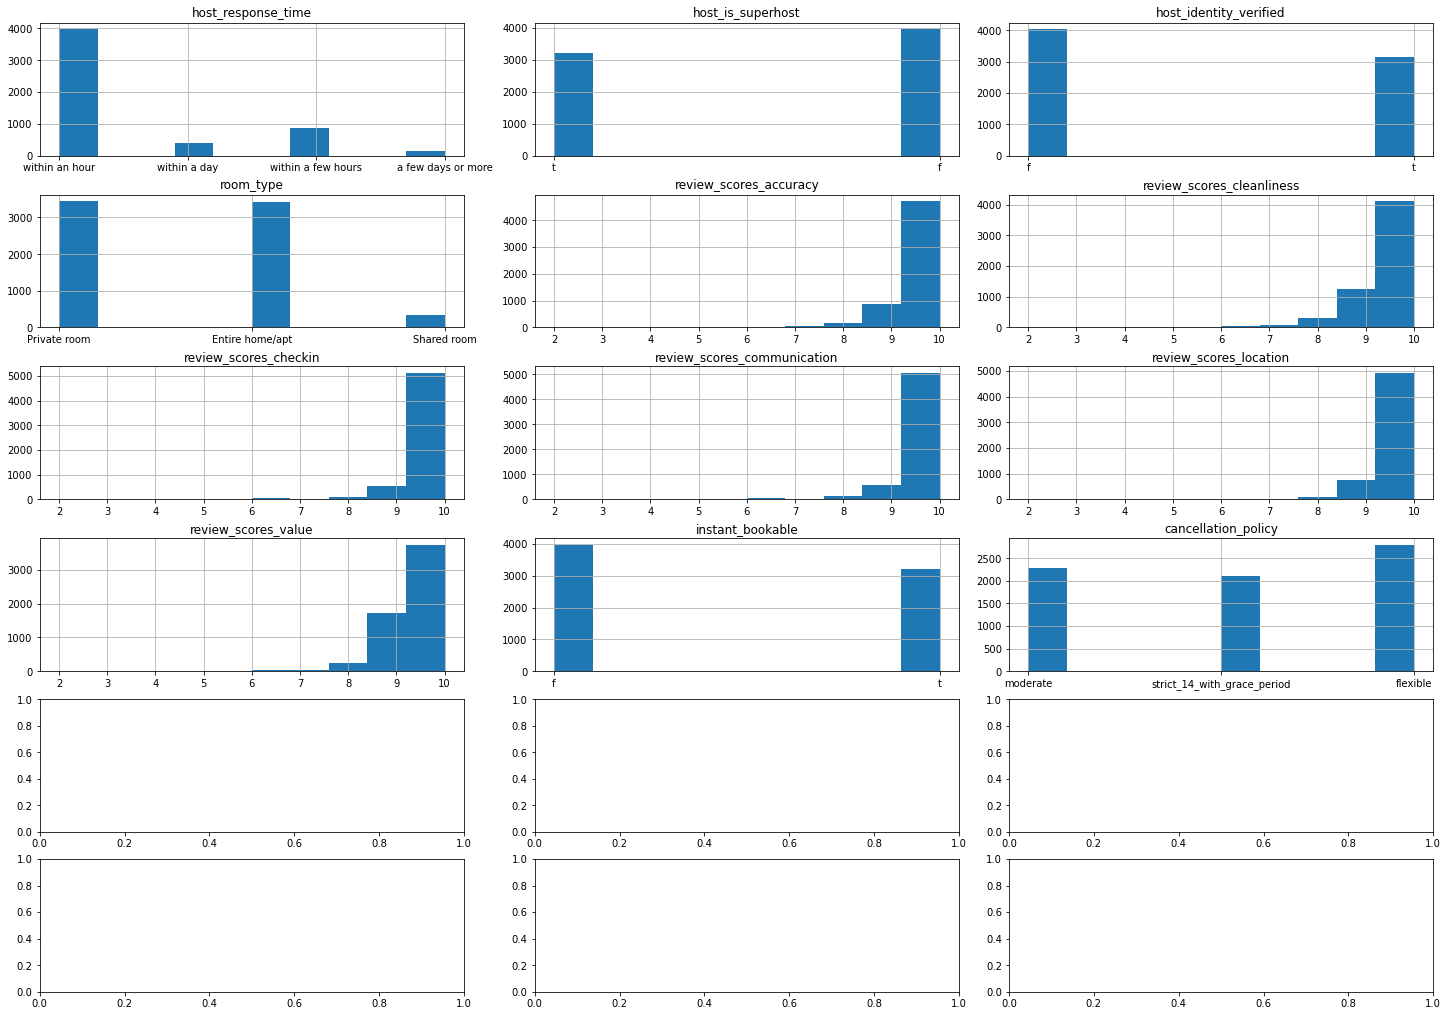

In [1680]:
# visualize the data
categories_less_10_plot(data)

### Amenities hot words analysis


In [1681]:
from collections import Counter

results = Counter()

In [1682]:
amenities = data['amenities']

In [1683]:
amenities.str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update).head(3)

0    None
1    None
2    None
Name: amenities, dtype: object

In [1684]:
# results

In [1685]:
sub_df = pd.DataFrame(results.most_common(50), columns=['amenities', 'count'])

In [1686]:
sub_df['ratio'] = round(sub_df['count'] / len(amenities), 4)


In [1687]:
sub_df.sort_values(by=['count'], ascending=False)

,amenities,count,ratio
0,Wifi,7042,0.9793
1,Essentials,6879,0.9566
2,Heating,6795,0.9449
3,Smoke alarm,6768,0.9412
4,Hangers,6456,0.8978
5,Shampoo,6250,0.8691
6,Carbon monoxide alarm,6152,0.8555
7,Laptop-friendly workspace,5976,0.8310
8,Hair dryer,5975,0.8309
9,Kitchen,5865,0.8156


### Location visualization:


In [1688]:
# data['latitude'].describe()

In [1689]:
# _, ax = plt.subplots(figsize=(8, 6))

# g = sns.scatterplot(x=data['longitude'],
#                     y=data['latitude'],
#                     data=data,
#                     ax=ax,
#                     alpha=0.3,
#                     hue=data['price'] / 100,
#                     palette='coolwarm')

# plt.show()

In [1690]:
# # Now intro Cali map jpeg
# import matplotlib.image as mpimg

# california_img = mpimg.imread("./california.png")

# _, ax = plt.subplots(figsize=(8, 6))

# sns.set_context(font_scale=2)

# g = sns.scatterplot(x=data['longitude'],
#                     y=data['latitude'],
#                     data=data,
#                     ax=ax,
#                     alpha=0.3,
#                     hue=data['price']/100,
#                     palette='coolwarm')

# # Now for cal map:
# ax.imshow(
#     california_img,
#     alpha=0.4,
#     extent=[
#         data['longitude'].min(), data['longitude'].max(),
#         data['latitude'].min(), data['latitude'].max()
#     ],
#     cmap=plt.get_cmap("jet"),
# )

# plt.show()


In [1691]:
# data.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)

### Corelation Matrix

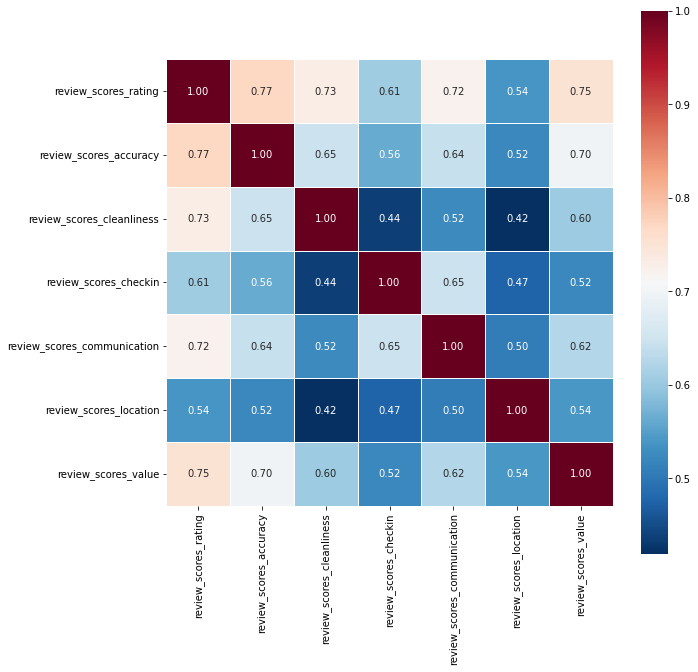

### PCA for the reviews_df

In [1739]:
# from sklearn.decomposition import PCA

In [1740]:
# pca_reviews = PCA(n_components=3)
# new_reviews = pca_reviews.fit_transform(reviews_df)

In [1741]:
# print(pca_reviews.explained_variance_ratio_)

In [1742]:
# _,axes = plt.subplots(1,3,figsize=(10,6),constrained_layout=True)

# axes[0].matshow(new_reviews)
# axes[1].plot(pca_reviews.explained_variance_ratio_)

# axes[2].plot(np.cumsum(pca_reviews.explained_variance_ratio_))
# axes[2].set(xlabel='number of components', ylabel='cumulative explained variance')

# plt.show()

In [1703]:
# inv_reviews = pd.DataFrame(pca_reviews.inverse_transform(new_reviews))

In [1704]:
# inv_reviews

,0,1,2,3,4,5,6
0,0.850490,0.806240,0.709664,0.563039,0.730174,0.463489,0.794855
1,0.822138,0.783745,0.682978,0.543679,0.704888,0.518583,0.782717
2,0.754390,0.687452,0.991254,0.469094,0.477570,0.431853,0.595849
3,0.605315,0.543639,0.457278,0.937373,0.750920,0.486732,0.458690
4,0.754832,0.711761,0.486929,0.766250,0.814299,0.504353,0.695194
5,0.511712,0.515489,0.411434,0.480218,0.482607,0.980225,0.574270
6,0.819107,0.795981,0.619448,0.487257,0.704323,0.610954,0.833412


### Create dummy variables

In [1706]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [1707]:
data_uiniqueness(data).tail(10)

,column_name,unique_values
61,review_scores_communication,9
59,review_scores_cleanliness,9
58,review_scores_accuracy,9
62,review_scores_location,8
15,host_response_time,5
66,cancellation_policy,3
18,host_is_superhost,3
22,host_identity_verified,3
31,room_type,3
65,instant_bookable,2


In [1708]:
cols = data_uiniqueness(data).tail(10).iloc[:,0]
data[cols].isna().sum()

review_scores_communication    1350
review_scores_cleanliness      1350
review_scores_accuracy         1350
review_scores_location         1351
host_response_time             1796
cancellation_policy               0
host_is_superhost                 1
host_identity_verified            1
room_type                         0
instant_bookable                  0
dtype: int64

In [1709]:
data['host_is_superhost'].dropna(inplace=True)
data['host_identity_verified'].dropna(inplace=True)
###???? can not drop??

In [1710]:
cols = data_uiniqueness(data).tail(6).iloc[:,0]

for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [1711]:
# data[data['host_identity_verified'] == 2]

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
707,8046925,Elegant 3b House 4mi to Super Bowl,- 4mi from Levi's Stadium - 1mi from train tha...,- Living room with a dinner table that seats 6...,- 4mi from Levi's Stadium - 1mi from train tha...,- Our neighborhood is extremely safe - Our nei...,"- You are in the center of everything, there a...",- CalTrain (the train that goes all the way up...,- You have access to every part of the house,- As much interaction as you would like (I am ...,"- Please do not be too loud after 9 pm, our ne...",NaN,NaN,NaN,NaN,4,NaN,NaN,2,NaN,NaN,None,2,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,"Santa Clara, CA",37.35438,-121.9677,House,0,6,1.0,3.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",2000.0,0.0,0.0,1,0.0,1,1125,1,1,1125,1.0,1125.0,3 months ago,30,60,90,365,1,0,2015-08-30,2015-08-30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,"{""SANTA CLARA""}",0,2,1,1,0,0,0.02


In [1728]:
# data[data['host_is_superhost'] == 2]

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
707,8046925,Elegant 3b House 4mi to Super Bowl,- 4mi from Levi's Stadium - 1mi from train tha...,- Living room with a dinner table that seats 6...,- 4mi from Levi's Stadium - 1mi from train tha...,- Our neighborhood is extremely safe - Our nei...,"- You are in the center of everything, there a...",- CalTrain (the train that goes all the way up...,- You have access to every part of the house,- As much interaction as you would like (I am ...,"- Please do not be too loud after 9 pm, our ne...",NaN,NaN,NaN,NaN,4,NaN,NaN,2,NaN,NaN,None,2,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,"Santa Clara, CA",37.35438,-121.9677,House,0,6,1.0,3.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",2000.0,0.0,0.0,1,0.0,1,1125,1,1,1125,1.0,1125.0,3 months ago,30,60,90,365,1,0,2015-08-30,2015-08-30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,"{""SANTA CLARA""}",0,2,1,1,0,0,0.02


In [1800]:
numeric_features = data.select_dtypes(
    include=['int64', 'float64', 'float32', 'int32'])

In [1803]:
numeric_features.isna().sum()

id                                              0
host_response_time                              0
host_is_superhost                               0
host_listings_count                             0
host_identity_verified                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0


In [1802]:
reviews_list = [
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

for col in reviews_list:
    numeric_features[col].fillna(numeric_features[col].mean(), inplace=True)

In [1804]:
df_corr = numeric_features._get_numeric_data().astype(float).corr()

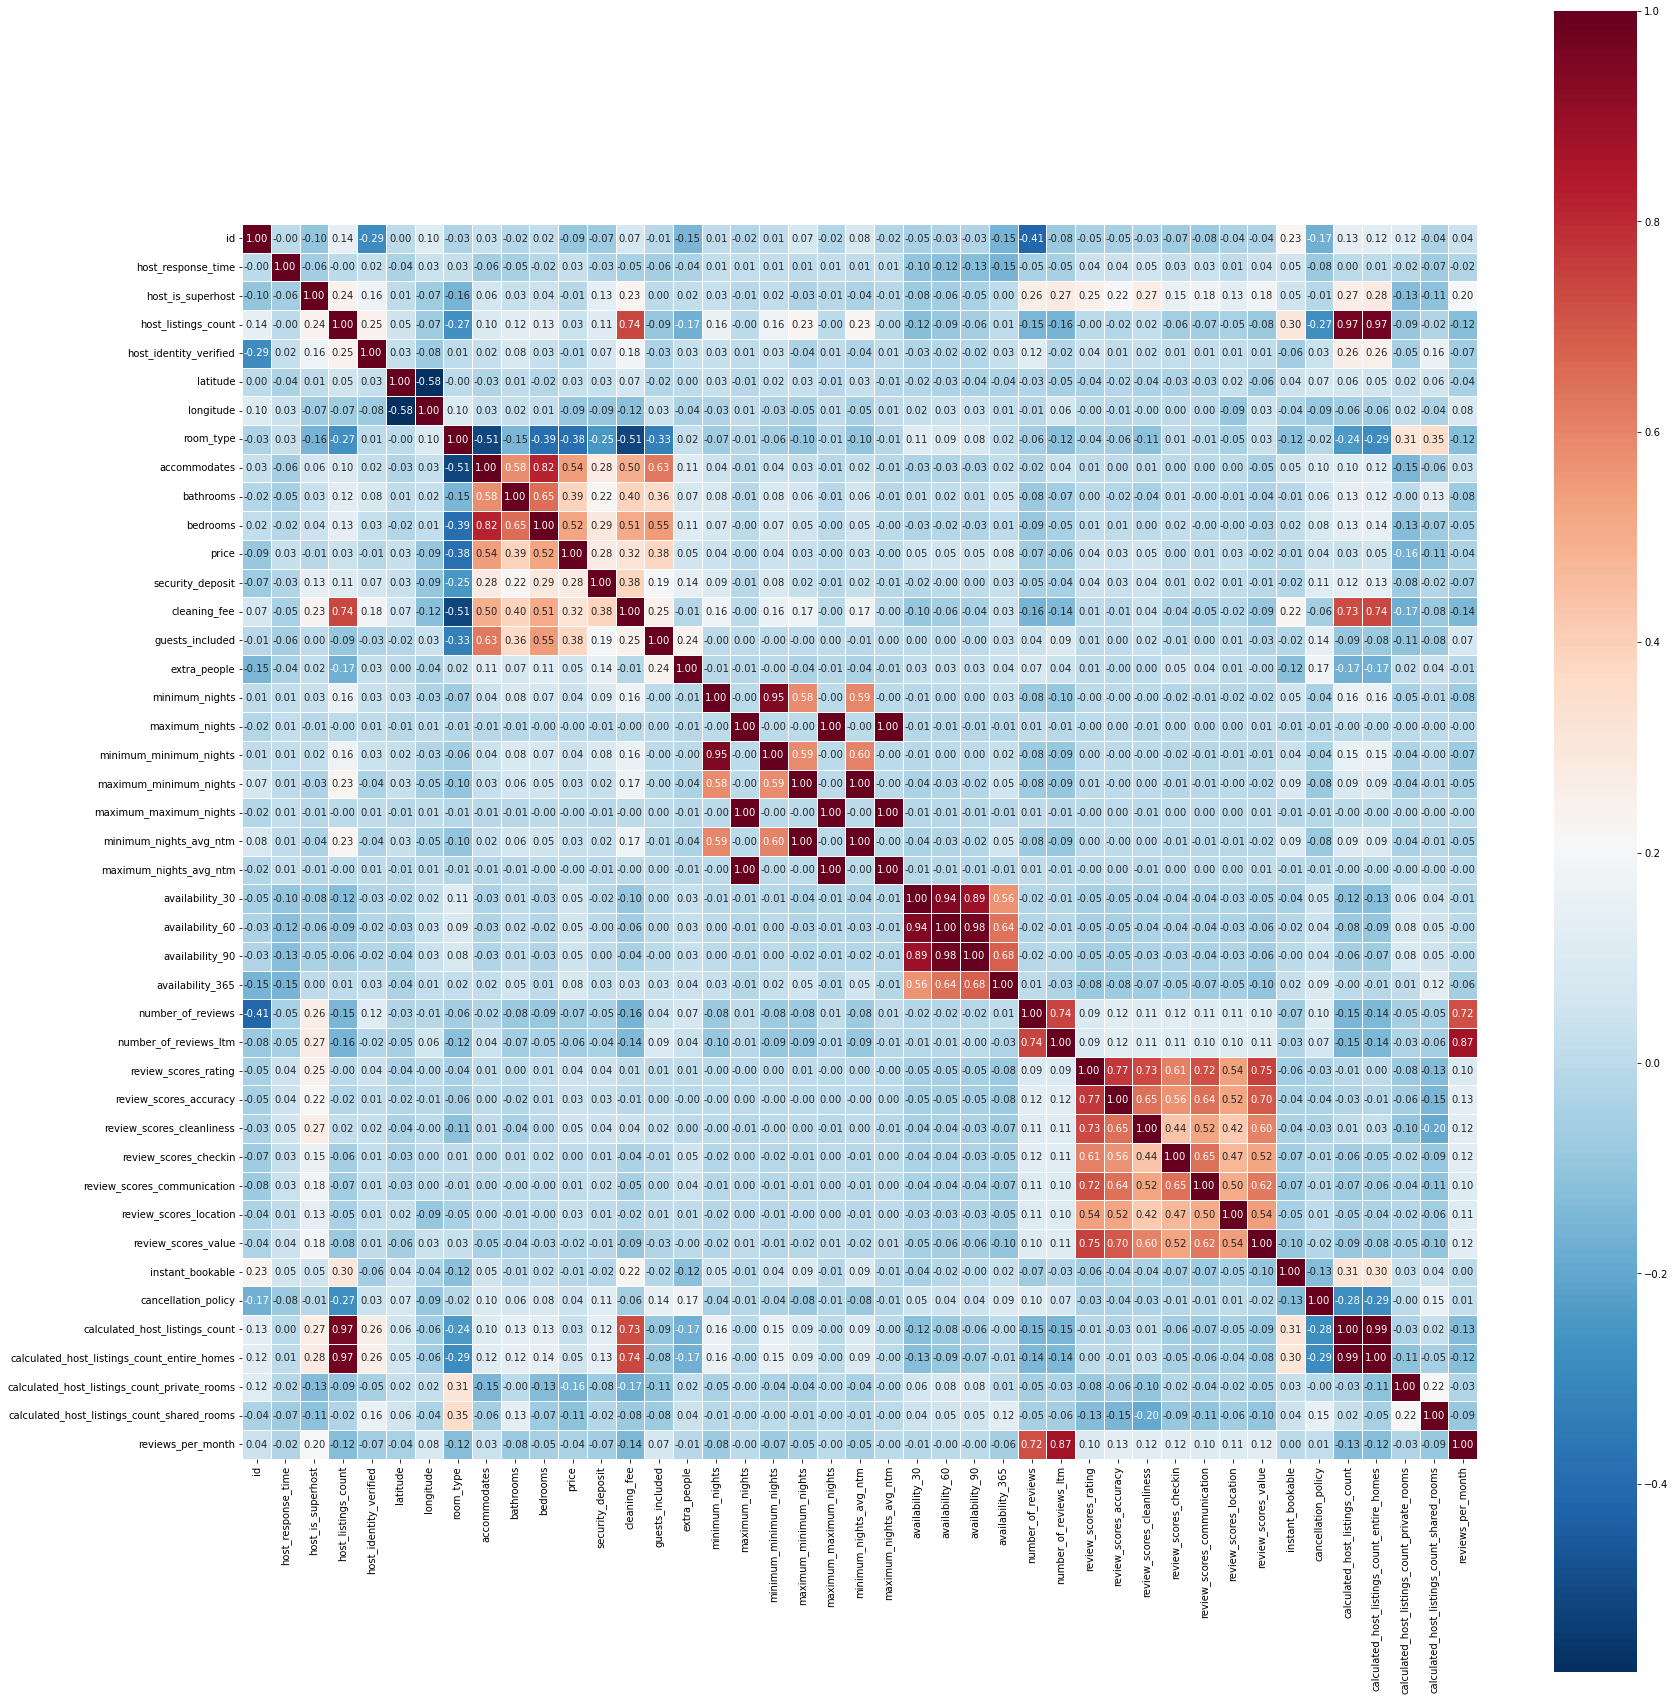

In [1805]:
_, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(df_corr,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax).figure.tight_layout()

plt.show()


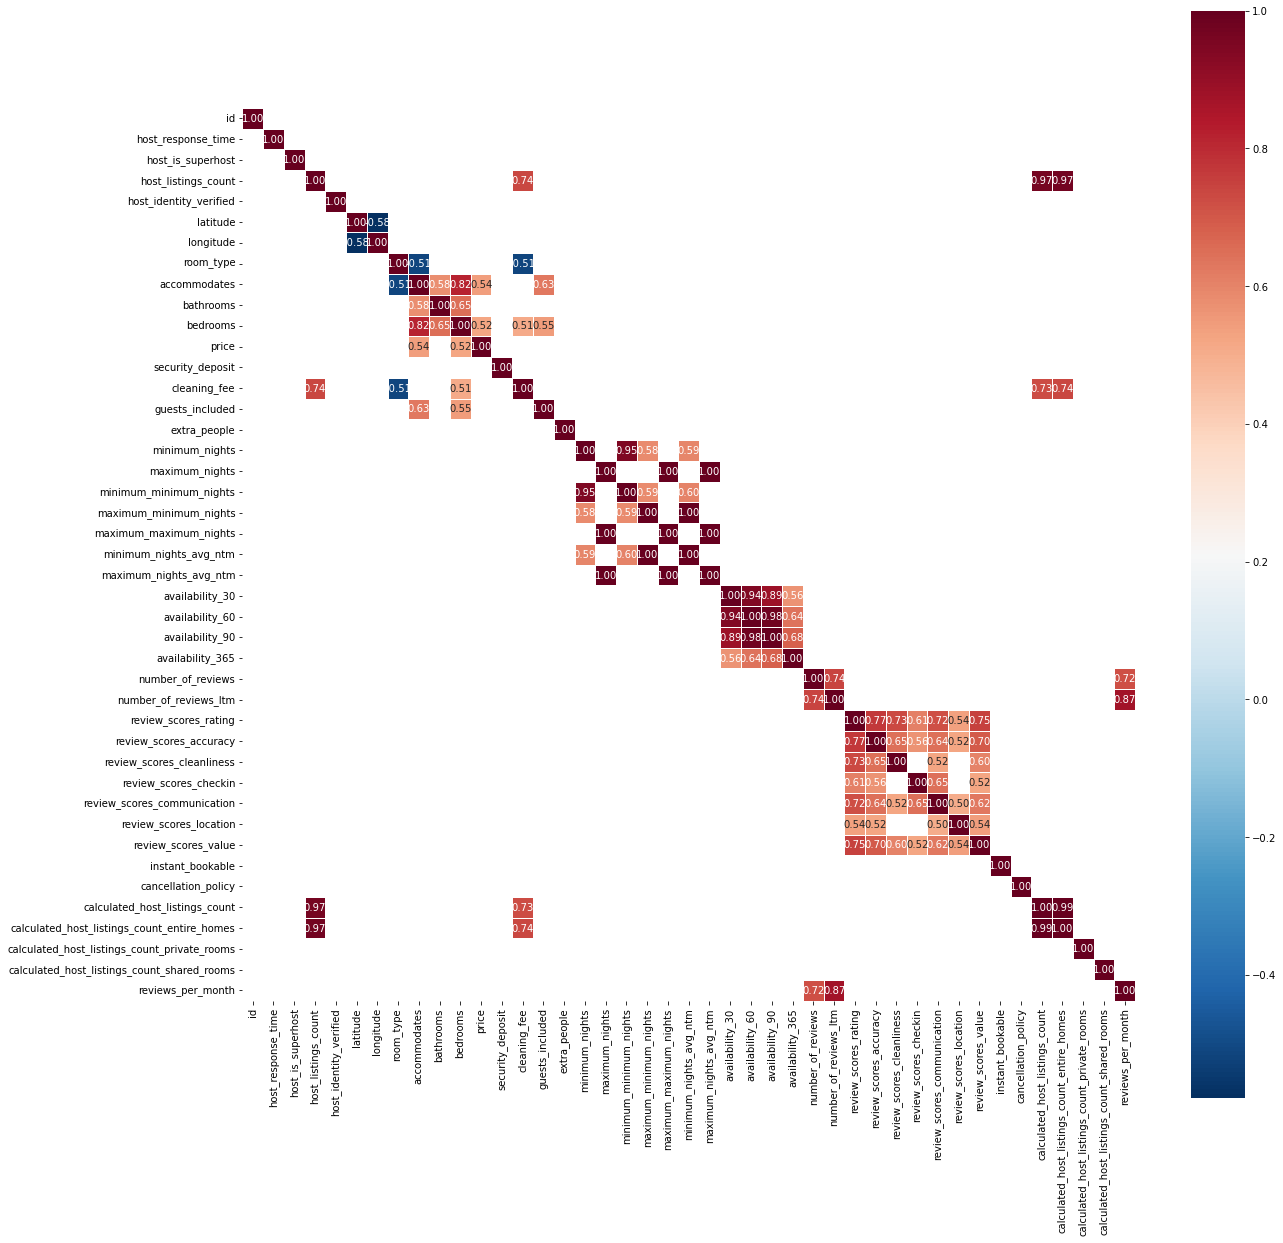

In [1806]:
# filter the correlation matrix with threshold

filtered_df = df_corr[((df_corr >= .5) | (df_corr <= -.5))
                      & (df_corr != 1)].dropna(how="all")

_, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(filtered_df,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax)

plt.show()

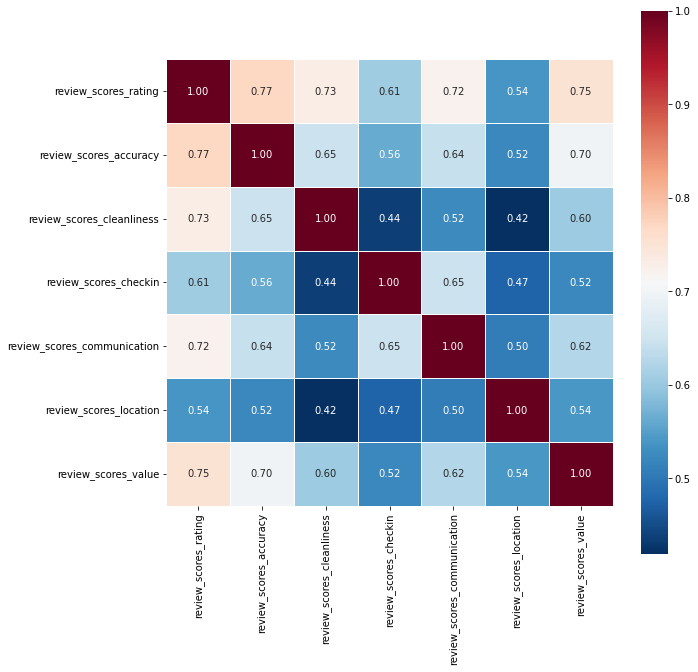

In [1807]:
reviews_list = [
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]
reviews_df = df_corr[reviews_list].loc[reviews_list]

_, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(reviews_df,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax)

plt.show()

In [1808]:
# c = df_corr.abs()
s = df_corr.unstack()
so = s.sort_values(kind="quicksort").drop_duplicates()

In [1809]:
so_df = pd.DataFrame(so[so > 0.5])
so_df

,,0
review_scores_communication,review_scores_location,0.504891
cleaning_fee,bedrooms,0.507870
review_scores_value,review_scores_checkin,0.520694
review_scores_accuracy,review_scores_location,0.522832
review_scores_cleanliness,review_scores_communication,0.523436
bedrooms,price,0.524789
review_scores_rating,review_scores_location,0.537458
review_scores_location,review_scores_value,0.539188
price,accommodates,0.539879
guests_included,bedrooms,0.549397


In [1810]:
from scipy.stats import zscore

In [1811]:
z_scores = zscore(numeric_features)

In [1812]:
new_airbnb = abs(z_scores)

In [1813]:
new_airbnb

,id,host_response_time,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.123071,0.050464,1.106459,0.285173,0.882899,1.350249,1.754652,0.736422,0.467376,0.931922,4.198567e-01,0.328440,0.508150,0.468093,0.431215,1.452459,0.223833,0.011806,0.204223,0.193566,0.011812,0.188804,0.011812,1.003767,1.144818,1.236907,1.129672,0.873948,0.618264,1.061501e-01,4.126385e-01,0.558916,3.197047e-01,0.332617,0.387372,6.294030e-01,0.899729,0.115994,0.284725,0.295125,0.324905,0.179657,5.682326e-01
1,2.122544,0.050464,0.902770,0.268278,0.882899,0.135790,0.202370,0.985168,0.892215,0.562895,2.252304e-16,0.358036,0.913523,1.587662,0.431215,0.153546,0.121441,0.011806,0.137715,0.004535,0.011812,0.005334,0.011812,1.200050,1.120031,1.072725,0.133973,0.464493,0.552505,1.201137e+00,4.126385e-01,0.558916,3.197047e-01,1.290453,1.518487,7.072200e-01,0.899729,0.115994,0.211293,0.169976,0.408012,0.179657,9.214201e-01
2,2.122025,2.217574,0.902770,0.291508,1.131354,0.523129,0.988326,0.985168,0.467376,0.562895,4.198567e-01,0.476421,1.522812,0.802751,0.431215,0.612405,0.581807,0.011814,0.593634,0.247507,0.011819,0.264185,0.011819,1.126589,1.082284,1.047063,0.133973,0.542083,0.618264,7.653748e-01,2.579567e+00,0.558916,3.197047e-01,0.332617,0.387372,6.294030e-01,0.899729,1.333679,0.316196,0.274267,0.408012,0.179657,8.997964e-01
3,2.121743,0.050464,1.106459,0.285173,0.882899,1.354725,1.754191,0.736422,0.892215,0.931922,4.198567e-01,0.275167,0.508150,0.468093,0.431215,1.681888,0.223833,0.011792,0.204223,0.193566,0.011798,0.188804,0.011798,1.003767,1.144818,1.236907,0.366935,4.540113,1.946319,2.514043e-01,4.126385e-01,0.558916,3.197047e-01,0.332617,0.387372,6.294030e-01,0.899729,0.115994,0.284725,0.295125,0.324905,0.179657,5.850327e-01
4,2.120437,1.083555,1.106459,0.291508,1.131354,0.713540,1.160981,0.736422,0.467376,0.562895,4.198567e-01,0.553371,0.508150,0.802751,0.431215,0.612405,0.252606,0.011820,0.232718,0.209318,0.011826,0.204982,0.011826,1.003767,1.144818,0.518355,1.009346,2.968900,0.618264,1.843582e-01,1.083464e+00,0.558916,3.197047e-01,0.332617,1.518487,7.072200e-01,0.899729,0.115994,0.316196,0.295125,0.114845,0.179657,1.237266e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,1.402151,1.083555,1.106459,0.291508,1.131354,0.220354,0.870394,0.985168,0.892215,0.562895,1.434204e+00,0.571129,0.507331,0.153415,0.431215,1.681888,0.195060,0.011776,0.175729,0.177813,0.011782,0.172625,0.011782,1.126589,0.012394,0.467030,0.917888,0.580879,0.618264,2.064186e-15,2.657613e-15,0.000000,3.073764e-15,0.000000,0.000000,2.374319e-15,0.899729,0.115994,0.316196,0.274267,0.408012,0.179657,2.080620e-15
7217,1.402269,1.184483,0.902770,0.293620,0.882899,0.038739,0.304762,0.985168,0.382302,0.562895,4.198567e-01,0.062074,0.507331,0.488072,0.189704,0.305312,0.581807,0.011776,0.593634,0.247507,0.011782,0.264185,0.011782,0.832747,0.931294,0.944412,1.411736,0.580879,0.618264,2.064186e-15,2.657613e-15,0.000000,3.073764e-15,0.000000,0.000000,2.374319e-15,0.899729,1.333679,0.326686,0.284696,0.408012,0.179657,2.080620e-15
7218,1.403162,1.184483,0.902770,0.295732,0.882899,0.630685,0.544475,0.736422,0.892215

In [1814]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [1815]:
scaled_features = scaler.fit_transform(new_airbnb)
scaled_features_airbnb = pd.DataFrame(scaled_features,
                                      index=new_airbnb.index,
                                      columns=new_airbnb.columns)


In [1816]:
from sklearn.model_selection import train_test_split

In [1817]:
X = scaled_features_airbnb.drop('price', axis=1)
y = scaled_features_airbnb['price']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [1836]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [1819]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
model = regressor.fit(X_train, y_train)
y1 = model.predict(X_test)

In [1820]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [1821]:
print('MSE', mean_squared_error(y_test, y1))
print('RMSE', math.sqrt(mean_squared_error(y_test, y1)))
print(
    'Adj R^2 value:', 1 - (1 - regressor.score(X_test, y_test)) *
    (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

MSE 0.675264017718034
RMSE 0.821744496615605
Adj R^2 value: 0.3326089132205483


In [1837]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [1840]:
# fit the classifier to the training set
clf.fit(X_train, y_train.astype(int))

RandomForestClassifier(random_state=0)

In [1841]:
# predict on the test set
y_pred = clf.predict(X_test)

<AxesSubplot:>

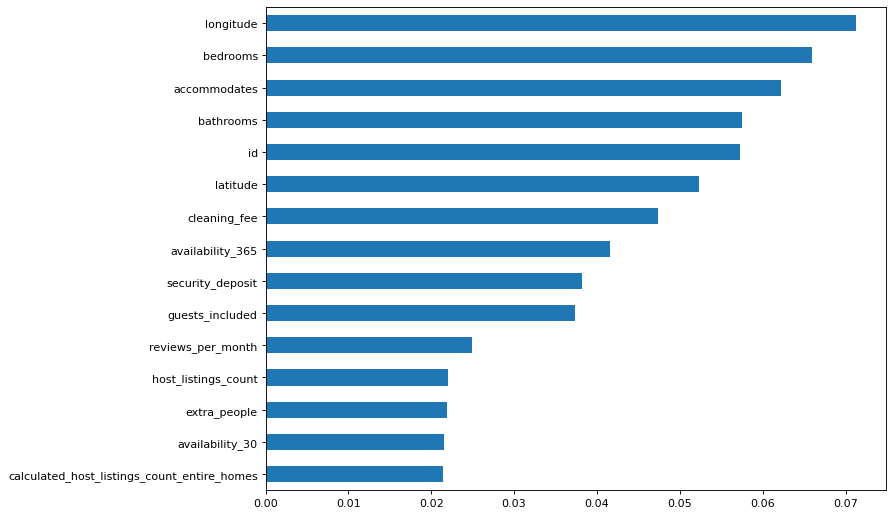

In [1842]:
# visualize feature importance

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)

feat_importances.nlargest(15).sort_values(ascending=True).plot(kind='barh')

In [1822]:

# nominal_features = data.select_dtypes(include=['object'])


## Modeling and prediction

# Part two-Fustion with reviews and neighbors

## Fusion with reviews


In [1823]:
reviews = pd.read_csv('./data/reviews.csv')
print(reviews.shape)
reviews.head()

(212513, 2)


,listing_id,date
0,4952,2009-08-02
1,4952,2009-09-04
2,4952,2009-10-16
3,4952,2009-12-10
4,4952,2010-06-08


In [1824]:
rev_row = reviews['listing_id'].unique()

In [1825]:
data_rev = data.loc[data['id'].isin(rev_row)]
data_rev.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",3,100%,98%,1,Palo Alto,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",0,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,"Palo Alto, CA",37.43972,-122.15672,Villa,1,2,2.0,1.000000,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",90.0,0.0,35.0,1,45.0,2,365,2,2,365,2.0,365.0,2 months ago,0,0,0,0,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,"{""PALO ALTO""}",0,1,5,0,5,0,0.57
1,11464,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,3,100%,90%,0,Santa Clara,13.0,"['email', 'phone', 'reviews']",0,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,"Santa Clara, CA",37.34342,-121.98829,Apartment,0,1,1.0,1.413918,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",85.0,700.0,250.0,1,10.0,14,365,14,14,365,14.0,365.0,5 months ago,30,60,90,179,6,1,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,"{""SANTA CLARA""}",0,1,12,12,0,0,0.08
2,17884,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,"This is a quiet neighborhood, and the suite sh...",Janet,2010-01-08,"Lynn Haven, Florida, United States","I am a software engineer, recently retired fro...",1,100%,50%,0,Palo Alto,2.0,"['email', 'phone', 'reviews', 'kba']",1,"Mountain View, CA, United States",Mountain View,Mountain View,Mountain Vie

In [1826]:
data_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723 entries, 0 to 7214
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5723 non-null   int64  
 1   name                                          5723 non-null   object 
 2   summary                                       5552 non-null   object 
 3   space                                         4563 non-null   object 
 4   description                                   5595 non-null   object 
 5   neighborhood_overview                         3878 non-null   object 
 6   notes                                         3189 non-null   object 
 7   transit                                       3615 non-null   object 
 8   access                                        3640 non-null   object 
 9   interaction                                   3634 non-null   o

In [1827]:
data_rev.describe(include='all')

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.723000e+03,5723,5552,4563,5595,3878,3189,3615,3640,3634,4189,5722,5722,5710,4042,5723.000000,4461,5410,5723.000000,4850,5723.000000,5723,5723.000000,5723,5355,5723,5722,5723,5723.000000,5723.000000,5723,5723.000000,5723.000000,5723.000000,5723.000000,5723,5723.000000,5723.000000,5723.000000,5723.000000,5723.000000,5723.000000,5.723000e+03,5723.000000,5723.000000,5.723000e+03,5723.000000,5.723000e+03,5723,5723.000000,5723.000000,5723.000000,5723.000000,5723.000000,5723.000000,5696,5696,5723.000000,5638.000000,5638.000000,5637.000000,5638.000000,5637.000000,5637.000000,4996,5723.000000,5723.000000,5723.000000,5723.000000,5723.000000,5723.000000,5723.000000
unique,NaN,5605,4910,3784,5214,3061,2477,2832,3046,2777,3227,1810,1862,181,1789,NaN,41,74,NaN,114,NaN,222,NaN,32,36,16,26,32,NaN,NaN,27,NaN,NaN,NaN,NaN,5236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN,NaN,NaN,1908,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,TRIBE ❤️ Deep Cleaned 2BR @ Great Mall Milpitas,The HackerHome Network New to the Valley? Tran...,"At Zeus, we focus exclusively on 30 day+ stays...","Dorm-style house in Silicon Valley. No-host, 5...",*Area Highlights* -Located in the Heart of the...,Parking is not included with your stay. Parkin...,This Flat Location is Uber/Lyft Accessible & C...,"• All utilities are included, including gas, e...",We're available 24/7 via Text | Email | Emerge...,By reserving your stay with Tribe you hereby a...,Zeus,2015-11-02,"San Jose, California, United States",Zeus is reinventing corporate housing. We do t...,NaN,100%,100%,NaN,Santa Clara,NaN,"['email', 'phone', 'reviews', 'kba']",NaN,"San Jose, CA, United States",Palo Alto,San Jose,San Jose,"San Jose, CA",NaN,NaN,House,NaN,NaN,NaN,NaN,"{Wifi,Kitchen,""Free parking on premises"",Break...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 months ago,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-10,2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""SAN JOSE""}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21,44,242,20,27,41,58,26,55,119,242,243,1648,242,NaN,3712,1944,NaN,580,NaN,400,NaN,2431,660,2320,2434,2431,NaN,NaN,3040,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1007,NaN,NaN,NaN,NaN,NaN,NaN,21,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.461640e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.942862,NaN,NaN,0.502359,NaN,102.049281,NaN,0.456229,NaN,NaN,NaN,NaN,NaN,37.352032,-121.966394,NaN,0.571728,3.109034,1.368775,1.397181,NaN,133.398742,252.305784,79.731959,1.740695,14.775817,8.283068,3.759170e+05,7.718679,9.733881,3.760767e+05,9.161995,3.760763e+05,NaN,13.250917,29.498340,47.022366,158.823694,36.608247,11.450813,NaN,NaN,95.334675,9.727918,9.581589,9.818698,9.798865,9.798474,9.532730,NaN,0.430718,0.96

In [1828]:
counts = reviews['listing_id'].value_counts()


In [1829]:
counts.head()

7476637     489
52786       478
10814836    445
19641513    429
13828514    427
Name: listing_id, dtype: int64

## Fusion with neighborhood data


In [1830]:
neighbors = pd.read_csv('./data/neighbourhoods.csv')
print(neighbors.shape)
neighbors.head()

(16, 2)


,neighbourhood_group,neighbourhood
0,NaN,Campbell
1,NaN,Cupertino
2,NaN,Gilroy
3,NaN,Los Altos
4,NaN,Los Altos Hills


In [1831]:
data_neighbor = data['neighbourhood'].unique().tolist()
neighbors_hood = neighbors['neighbourhood'].unique().tolist()

In [1832]:
same_locations = []

for neighbor in neighbors_hood:
    if neighbor in data_neighbor:
        same_locations.append(neighbor)

In [1833]:
same_locations

['Campbell',
 'Cupertino',
 'Los Altos',
 'Los Altos Hills',
 'Mountain View',
 'Palo Alto',
 'Santa Clara',
 'Sunnyvale']

In [1834]:
data_neighbor

['Palo Alto',
 'Santa Clara',
 'Mountain View',
 'South San Jose',
 'Cupertino',
 'Sunnyvale',
 'Downtown',
 'Campbell',
 'West Valley',
 'Edenvale',
 nan,
 'Willow Glen',
 'Central San Jose',
 'Los Altos',
 'Berryessa',
 'Cory',
 'College Park',
 'Alum Rock',
 'Cambrian/Pioneer',
 'North San Jose',
 'Los Altos Hills',
 'Burbank/Del Monte',
 'Evergreen',
 'Newhall/Sherwood',
 'Shasta/Hanchett Park',
 'Rose Garden',
 'Five Wounds/Brookwood Terrace',
 'Naglee Park',
 'Forest/Pruneridge',
 'Alviso',
 'Japantown',
 'Stanford',
 'Delmas Park',
 'Chapman/Morse',
 'Menlo Park',
 'Autumn/Montgomery',
 'Vermont/McKendrie']

In [1835]:
neighbors_hood

['Campbell',
 'Cupertino',
 'Gilroy',
 'Los Altos',
 'Los Altos Hills',
 'Los Gatos',
 'Milpitas',
 'Monte Sereno',
 'Morgan Hill',
 'Mountain View',
 'Palo Alto',
 'San Jose',
 'Santa Clara',
 'Saratoga',
 'Sunnyvale',
 'Unincorporated Areas']

## ideas list

### methdology for this large scale data?

### which cols we need

### What to compare

- Room Type vs Price
- Price/log price Distribution Plot
- clean fee

### pipleline?

## Codes for refering

- [amenities refer](https://www.kaggle.com/brittabettendorf/predicting-prices-xgboost-feature-engineering)
- [word cloud /weighted words /sentimental analsys / topic modeling](https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data)

### nextweek

modeling for price prediction
